In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [360]:
# 1
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [362]:
# 2 
df['BMI'] = (df['weight'] / (df['height']/100)**2)
df['overweight'] = (df['BMI'] > 25).astype(int)

In [363]:
# 3 
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

In [364]:
# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 
                                                         'alco', 'active', 'overweight'])
    
    # 6
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size()
    df_cat = df_cat.rename(columns={'size': 'total'})

    # 7
    sns.catplot(df_cat, x='variable', y='total', hue='value', col='cardio', kind='bar').fig

    # 8
    fig = plt.gcf()

    # 9
    fig.savefig('catplot.png')
    return fig

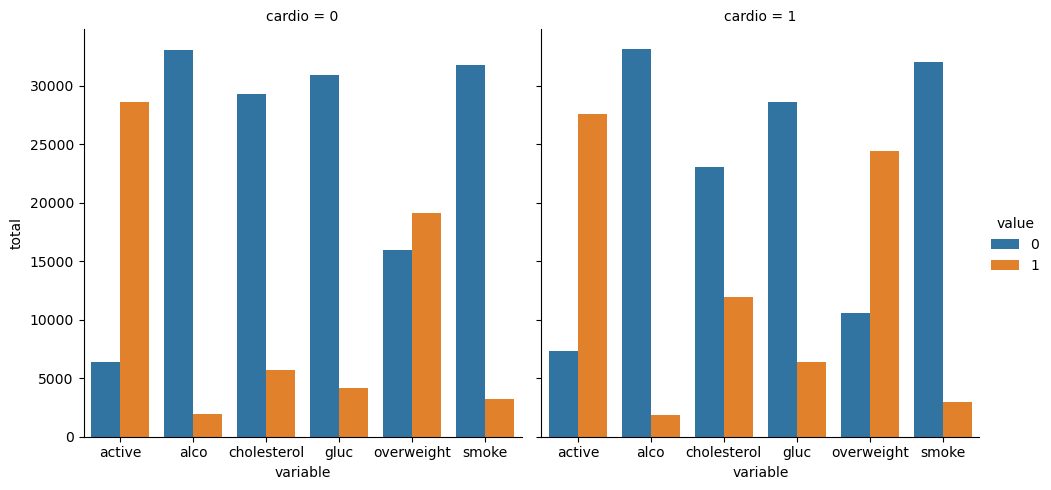

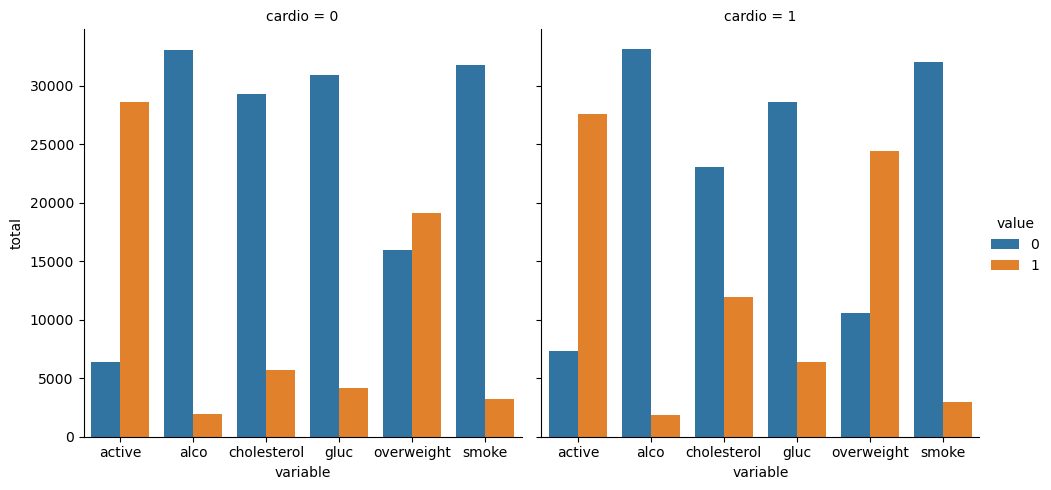

In [365]:
draw_cat_plot()

In [382]:
# 10
def draw_heat_map():
    # 11
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975)) 
    ]

    # 12
    df_heat = df_heat.drop(columns=['BMI'])
    corr = df_heat.corr()

    # 13
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 14
    fig, ax = plt.subplots(figsize=(10, 8))

    # 15
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', ax=ax, cmap='coolwarm')

    # 16
    fig.savefig('heatmap.png')
    return fig

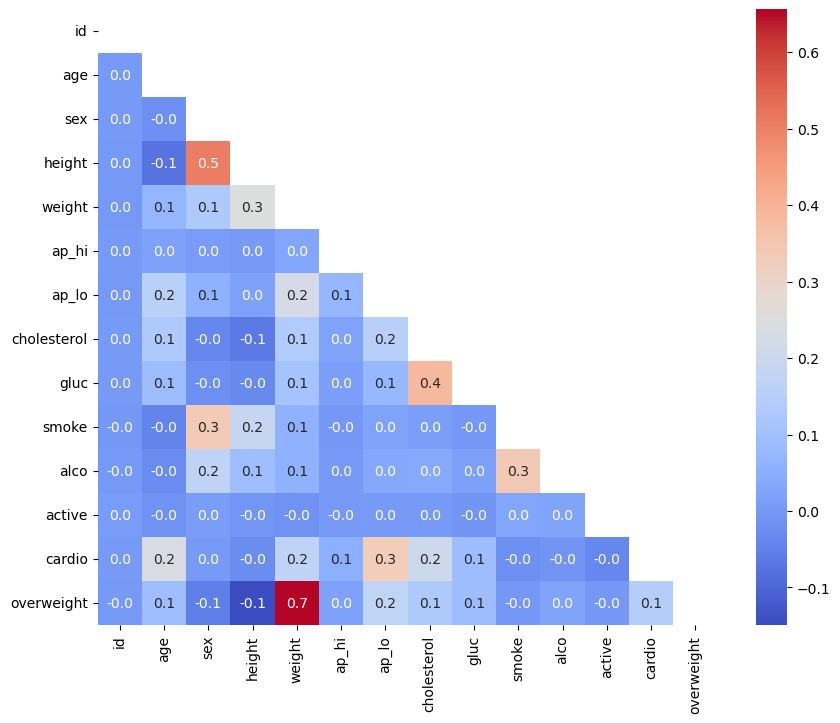

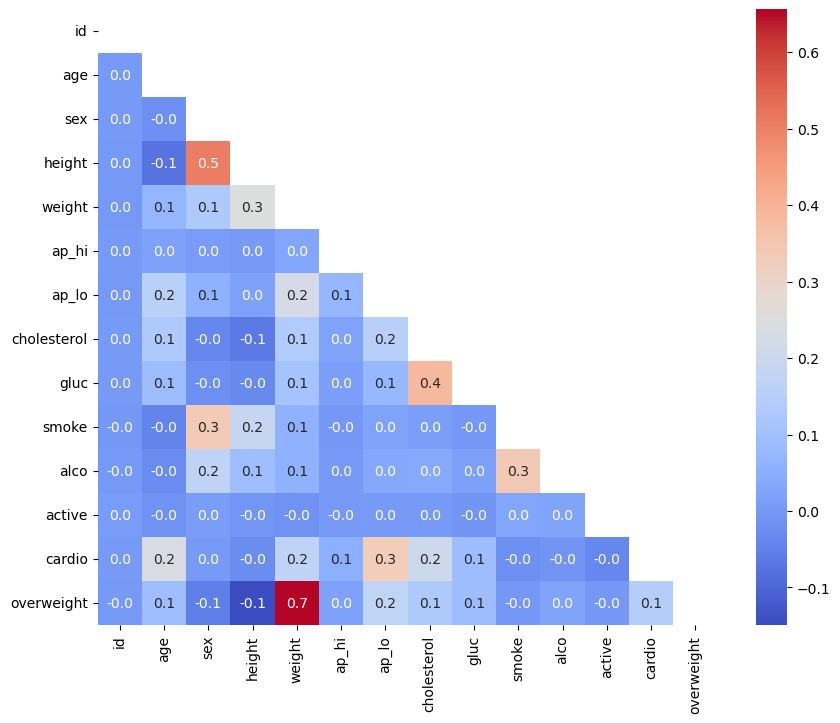

In [384]:
draw_heat_map()